1. Libraries
2. Import Model
3. Import Processor
4. Prompt, import image
5. Inference

## ***Install Required Libraries***

In [1]:
!pip install numpy==1.24.4 Pillow==10.3.0 Requests==2.31.0 torch==2.3.0 torchvision==0.18.0 transformers==4.40.2

In [2]:
!pip install accelerate

In [3]:
!mkdir my_models
!mkdir my_models/phi_3_vision

## ***Import Phi-3-vision model***

In [4]:
from transformers import AutoModelForCausalLM

model_id = "microsoft/Phi-3-vision-128k-instruct"

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             cache_dir="/content/my_models/phi_3_vision",
                                             device_map="cuda",
                                             trust_remote_code=True,
                                             torch_dtype="auto",
                                             _attn_implementation="eager")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

configuration_phi3_v.py:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- configuration_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3_v.py:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

image_embedding_phi3_v.py:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- modeling_phi3_v.py
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.35G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# model.config

## ***Get the Processor***

In [5]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

processing_phi3_v.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

image_processing_phi3_v.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- processing_phi3_v.py
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
print(processor.__doc__)


    Constructs a Phi3-V processor which wraps a Phi3-V image processor and a LLaMa tokenizer into a single processor.

    [`Phi3VProcessor`] offers all the functionalities of [`Phi3VImageProcessor`] and [`LlamaTokenizerFast`]. See the
    [`~Phi3VProcessor.__call__`] and [`~Phi3VProcessor.decode`] for more information.

    Args:
        image_processor ([`Phi3VImageProcessor`], *optional*):
            The image processor is a required input.
        tokenizer ([`LlamaTokenizerFast`], *optional*):
            The tokenizer is a required input.
    


In [ ]:
user_question_1 = input("Enter the first question: ")
user_question_2 = input("Enter the second question: ")
user_question_3 = input("Enter the third question: ")

Enter the first question: How many vehicles are there in the given image?
Enter the second question: Is there any animal ?
Enter the third question: Is there any BMW model car ?


## ***Create Prompt***

In [ ]:
# Prepare the messages with user input
messages = [
    {
        "role": "user",
        "content": f"<|image_1|>\n1.) {user_question_1} 2.) {user_question_2} 3.) {user_question_3}"
    }
]

# Create a prompt from the user-provided questions
prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(f"\nGenerated Prompt: {prompt}")


Generated Prompt: <|user|>
<|image_1|>
1.) How many vehicles are there in the given image? 2.) Is there any animal ? 3.) Is there any BMW model car ?<|end|>
<|assistant|>



In [ ]:
prompt

'<|user|>\n<|image_1|>\n1.) How many vehicles are there in the given image? 2.) Is there any animal ? 3.) Is there any BMW model car ?<|end|>\n<|assistant|>\n'

## ***Fetch Input Image***

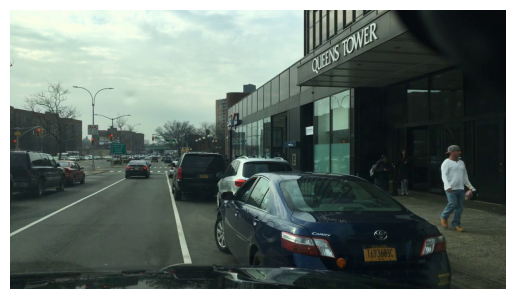

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

url = "https://drive.google.com/uc?export=view&id=1T-qnWzsdokXMQe0KJmdJgfUmrNTWsj7-"
image = Image.open(requests.get(url, stream=True).raw)
image.show()

plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

## ***Convert Inputs to Tokens***

In [ ]:
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

In [ ]:
inputs

{'input_ids': tensor([[    1, 32010, 29871,  ..., 29871,    13, 32001]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           ...,
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303]],

          [[ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           ...,
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0

In [ ]:
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

## ***Inference***

In [ ]:
%%time
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-3-vision-128k-instruct/c45209e90a4c4f7d16b2e9d48503c7f3e83623ed/image_embedding_phi3_v.py:197: UserWarning: Phi-3-V modifies `input_ids` in-place and the tokens indicating images will be removed after model forward. If your workflow requires multiple forward passes on the same `input_ids`, please make a copy of `input_ids` before passing it to the model.
  warnings.warn(


CPU times: user 16.8 s, sys: 0 ns, total: 16.8 s
Wall time: 16.8 s


In [ ]:
# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(response)

1) There are multiple vehicles in the image, including cars and a truck. 2) No animals are visible in the image. 3) No BMW model car is visible in the image.


## ask questions in **loop**

In [7]:
# List of questions extracted from the initial prompt
questions = [
    " answre yes or no only :are there more than 5 cars?",
    "answre yes or no only :Is it daylight?",
    "answre yes or no only: is there any barber shop?"
]

# List to store the questions and corresponding answers
qa_pairs = []

# Generation arguments remain the same
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

# Loop through each question, call the model, and store the result
for question in questions:
    # Update the message content for the current question
    current_message = [
        {"role": "user", "content": f"<|image_1|>\n{question}"}
    ]

    # Create a new prompt for the current question
    prompt = processor.tokenizer.apply_chat_template(current_message, tokenize=False, add_generation_prompt=True)

    # Prepare inputs with the image for the current prompt
    inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

    # Call the model to generate a response
    generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

    # Remove input tokens from the generated sequence to get the model's response
    generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]

    # Decode the model's response
    response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    # Print the current question and response
    print(f"Question: {question}")
    print(f"Response: {response}\n")

    # Store the question and the response in a dictionary
    qa_pairs.append({"question": question, "response": response})

# Optional - Print or store the complete list of question-answer pairs
print("All Q&A Pairs:")
for pair in qa_pairs:
    print(f"Q: {pair['question']}")
    print(f"A: {pair['response']}\n")


NameError: name 'image' is not defined

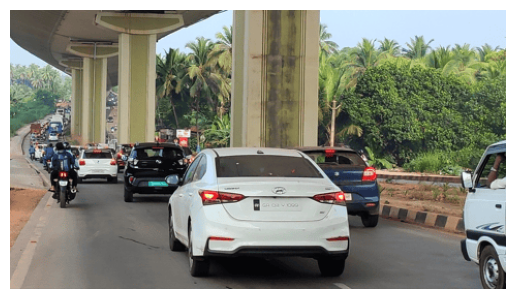

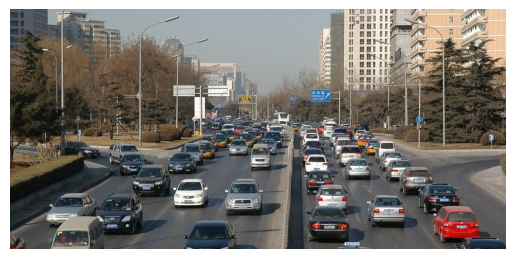

Processing Image 1


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-3-vision-128k-instruct/c45209e90a4c4f7d16b2e9d48503c7f3e83623ed/image_embedding_phi3_v.py:197: UserWarning: Phi-3-V modifies `input_ids` in-place and the tokens indicating images will be removed after model forward. If your workflow requires multiple forward passes on the same `input_ids`, please make a copy of `input_ids` before passing it to the model.
  warnings.warn(


Question: answer yes or no only: are there more than 5 cars?
Response: Yes, there are more than 5 cars visible in the image.

Question: answer yes or no only: Is it daylight?
Response: Yes, it is daylight.

Question: answer yes or no only: is there any barber shop?
Response: No, there is no barber shop visible in the image.

Question: answer yes or no only: is there a bike?
Response: Yes, there is a motorcycle.

Processing Image 2
Question: answer yes or no only: are there more than 5 cars?
Response: Yes, there are more than 5 cars visible in the image.

Question: answer yes or no only: Is it daylight?
Response: Yes, it is daylight.

Question: answer yes or no only: is there any barber shop?
Response: No, there is no barber shop visible in the image.

Question: answer yes or no only: is there a bike?
Response: No, there is no bike visible in the image.

Results for Image 1:
Q: answer yes or no only: are there more than 5 cars?
A: Yes, there are more than 5 cars visible in the image.

Q

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

# List of image URLs
image_urls = [
    "https://media.assettype.com/gomantaktimes%2F2022-12%2F75ca7af6-6674-4e9b-a147-fcbb121a79db%2FGT_ARTICLE_BANNERS__59_.png?w=480&dpr=2&auto=format%2Ccompress&fit=max&q=85",  # First image URL
    "https://d1oudmv8ilx665.cloudfront.net/newroads/wp-content/uploads/2019/02/01075051/city-driving.jpg"  # Second image URL
]

# Load and display each image
images = []
for url in image_urls:
    try:
        image = Image.open(requests.get(url, stream=True).raw)
        images.append(image)
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Failed to load image from {url}. Error: {e}")

# Process both images with the same set of questions
questions = [
    "answer yes or no only: are there more than 5 cars?",
    "answer yes or no only: Is it daylight?",
    "answer yes or no only: is there any barber shop?",
    "answer yes or no only: is there a bike?"
]

qa_pairs_all_images = []  # List to store responses for all images

# Generation arguments remain the same
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

# Loop through each image and question
for i, image in enumerate(images):
    print(f"Processing Image {i+1}")
    qa_pairs_for_image = []  # Store Q&A pairs for this image

    for question in questions:
        # Update the message content for the current question
        current_message = [
            {"role": "user", "content": f"<|image_1|>\n{question}"}
        ]

        # Create a new prompt for the current question
        prompt = processor.tokenizer.apply_chat_template(current_message, tokenize=False, add_generation_prompt=True)

        # Prepare inputs with the image for the current prompt
        inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

        # Call the model to generate a response
        generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

        # Remove input tokens from the generated sequence to get the model's response
        generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]

        # Decode the model's response
        response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

        # Print the current question and response
        print(f"Question: {question}")
        print(f"Response: {response}\n")

        # Store the question and the response for this image
        qa_pairs_for_image.append({"question": question, "response": response})

    # Add this image's Q&A pairs to the main list
    qa_pairs_all_images.append({"image": f"Image {i+1}", "qa_pairs": qa_pairs_for_image})

# Optional - Print all Q&A pairs for all images
for image_qa in qa_pairs_all_images:
    print(f"Results for {image_qa['image']}:")
    for pair in image_qa['qa_pairs']:
        print(f"Q: {pair['question']}")
        print(f"A: {pair['response']}\n")


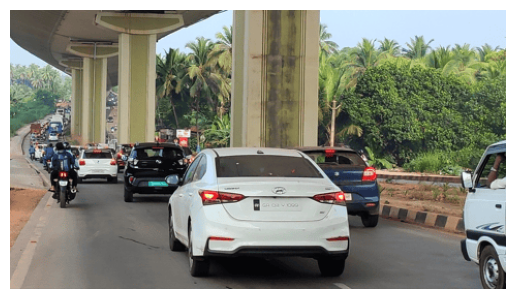

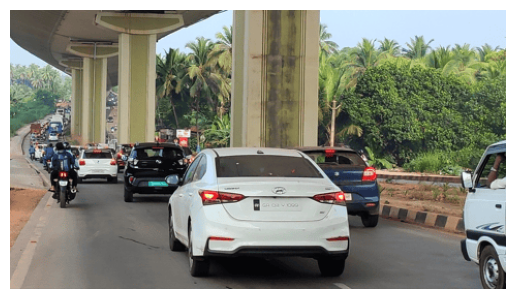

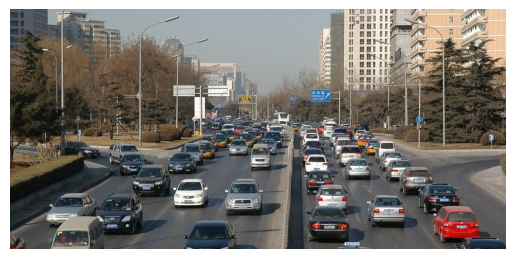

Processing Image 1
Question: answer yes or no only: are there more than 5 cars?
Response: Yes, there are more than 5 cars visible in the image.

Question: answer yes or no only: Is it daylight?
Response: Yes, it is daylight.

Question: answer yes or no only: is there any barber shop?
Response: No, there is no barber shop visible in the image.

Question: answer yes or no only: is there a bike?
Response: Yes, there is a motorcycle.

Processing Image 2
Question: answer yes or no only: are there more than 5 cars?
Response: Yes, there are more than 5 cars visible in the image.

Question: answer yes or no only: Is it daylight?
Response: Yes, it is daylight.

Question: answer yes or no only: is there any barber shop?
Response: No, there is no barber shop visible in the image.

Question: answer yes or no only: is there a bike?
Response: No, there is no bike visible in the image.


Comparison Table (1 = same answer, 0 = different answer):
--------------------------------------------------------

In [9]:
%%time
import matplotlib.pyplot as plt
from PIL import Image
import requests

# List of image URLs
image_urls = [
    "https://media.assettype.com/gomantaktimes%2F2022-12%2F75ca7af6-6674-4e9b-a147-fcbb121a79db%2FGT_ARTICLE_BANNERS__59_.png?w=480&dpr=2&auto=format%2Ccompress&fit=max&q=85",  # First image URL
    "https://d1oudmv8ilx665.cloudfront.net/newroads/wp-content/uploads/2019/02/01075051/city-driving.jpg"  # Second image URL
]

# Load and display each image
images = []
for url in image_urls:
    try:
        image = Image.open(requests.get(url, stream=True).raw)
        images.append(image)
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Failed to load image from {url}. Error: {e}")

# Process both images with the same set of questions
questions = [
    "answer yes or no only: are there more than 5 cars?",
    "answer yes or no only: Is it daylight?",
    "answer yes or no only: is there any barber shop?",
    "answer yes or no only: is there a bike?"
]

qa_pairs_all_images = []  # List to store responses for all images
image_responses = []  # List to store yes/no answers

# Generation arguments remain the same
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

# Loop through each image and question
for i, image in enumerate(images):
    print(f"Processing Image {i+1}")
    qa_pairs_for_image = []  # Store Q&A pairs for this image
    yes_no_responses = []  # Store only yes/no responses for this image

    for question in questions:
        # Update the message content for the current question
        current_message = [
            {"role": "user", "content": f"<|image_1|>\n{question}"}
        ]

        # Create a new prompt for the current question
        prompt = processor.tokenizer.apply_chat_template(current_message, tokenize=False, add_generation_prompt=True)

        # Prepare inputs with the image for the current prompt
        inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

        # Call the model to generate a response
        generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

        # Remove input tokens from the generated sequence to get the model's response
        generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]

        # Decode the model's response
        response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

        # Extract 'Yes' or 'No' from the response (first word)
        yes_no_response = response.split()[0]
        yes_no_responses.append(yes_no_response)

        # Print the current question and response
        print(f"Question: {question}")
        print(f"Response: {response}\n")

        # Store the question and the response for this image
        qa_pairs_for_image.append({"question": question, "response": response})

    # Store yes/no responses for this image
    image_responses.append(yes_no_responses)

    # Add this image's Q&A pairs to the main list
    qa_pairs_all_images.append({"image": f"Image {i+1}", "qa_pairs": qa_pairs_for_image})

# Compare the yes/no responses between the two images and create a comparison matrix
comparison_matrix = []
for i in range(len(questions)):
    comparison_matrix.append(1 if image_responses[0][i] == image_responses[1][i] else 0)

# Print the comparison results in table format
print("\nComparison Table (1 = same answer, 0 = different answer):")
print("--------------------------------------------------------")
print("| More than 5 cars | Daylight | Barber Shop | Bike |")
print(f"|        {comparison_matrix[0]}        |    {comparison_matrix[1]}     |      {comparison_matrix[2]}      |   {comparison_matrix[3]}  |")
print("--------------------------------------------------------")
